In [1]:
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, Aer, transpile
from matplotlib import pyplot as plt
import os
import sys
import numpy as np
import json
import time

home_folder = os.getcwd()
while not home_folder.endswith("AutomatedPERTools"):
    home_folder = os.path.dirname(home_folder)
sys.path.append(os.path.join(home_folder, "pauli_lindblad_per"))

from tomography.experiment import SparsePauliTomographyExperiment as tomography
from primitives.pauli import QiskitPauli
import pickle

In [2]:
def decipher_name(namebase):
    dic = dict()
    split_namebase = namebase.split("_")
    for i,j in enumerate(split_namebase):
        #print(i, j)
        pass
    #parser.add_argument('--plusone', '-p', help='Takes Neighboring qubits into account', default=False, action='store_true')
    dic["tomography_connections"] = (split_namebase[0] == "True")
    #parser.add_argument('--sum', '-s', help='Same as -p and turns sumation on over neighboring qubits', default=False, action='store_true')
    dic["sum_over_lambda"] = (split_namebase[1] == "True")
    if dic["sum_over_lambda"]:
        dic["tomography_connections"] = True
    #parser.add_argument('--pntsamples', type=int, help='How many samples in PNT? Default: 16', default=16)
    dic["pntsamples"] = int(split_namebase[2])
    #parser.add_argument('--pntsinglesamples', type=int, help='How many single samples in PNT? Default: 100', default=100)
    dic["pntsinglesamples"] = int(split_namebase[3])
    #parser.add_argument('--persamples', type=int, help='How many samples in PER? Default: 100', default=100)
    dic["persamples"] = int(split_namebase[4])
    #parser.add_argument('--shots', type=int, help='How many shots? Default: 1000', default=1000)
    dic["shots"] = int(split_namebase[5])
    #parser.add_argument('--backend', type=str, help='Which backend to use? Default: FakeVigoV2', default="FakeVigoV2")
    dic["backend"] = split_namebase[6]
    import qiskit.providers.fake_provider as fake_provider
    backend = fake_provider.FakeVigoV2()
    if split_namebase[6] != "FakeVigoV2":
        method = getattr(fake_provider, split_namebase[6])
        backend = method()

    #parser.add_argument('--cross', '-c', help='Simulates Cross Talk Noise', default=False, action='store_true')
    dic["do_cross_talk_noise"] = (split_namebase[7] == "True")
    #parser.add_argument('--allqubits', '-a', help='runs over all qubits in the tomography', default=False, action='store_true')
    dic["allqubits"] = (split_namebase[8] == "True")
    #parser.add_argument('--onlyTomography', help='Only does the tomography and then ends the program', default=False, action='store_true')
    dic["onlyTomography"] = (split_namebase[9] == "True")

    #parser.add_argument('--setqubits', type=int, nargs='+', help='Which qubits to use?: Default: 0123 and transpile')
    import ast
    dic["qubits"]= ast.literal_eval(split_namebase[10])
    dic["num_qubits"] = len(dic["qubits"])
    #if split_namebase[7] == '[0,1,2,3]' and split_namebase[8] == 'and' and split_namebase[9] == 'transpile':
    return dic

In [3]:
main_folder = "tutorial_notebooks/testrun/testrun"
folders = [f for f in os.listdir(os.path.join(home_folder, main_folder)) if os.path.isdir(os.path.join(os.path.join(home_folder, main_folder), f))]
filtered_folders = [f for f in folders if "FakeVigoV2" in f and not decipher_name(f)["do_cross_talk_noise"]]
print(filtered_folders)

['False_False_64_1000_100_1024_FakeVigoV2_False_False_True_{1, 2, 3, 4}', 'True_False_64_1000_100_1024_FakeVigoV2_False_False_True_{1, 2, 3, 4}', 'False_False_64_1000_100_1024_FakeVigoV2_False_True_True_{1, 2, 3, 4}']


In [5]:
filtered_folders2 = os.path.join(os.path.join(home_folder, main_folder),folders[1])
for folder in filtered_folders:
    try:
        with open(os.path.join(os.path.join(home_folder, main_folder),folder) + "/noisedataframe.pickle", "rb") as f:
            noisedataframe = pickle.load(f)
        for key in noisedataframe.noisemodels:
            local_keys = [i for i,j in noisedataframe.noisemodels[key].coeffs]
        print(folder, "is noisedataframe")
    except:
        try:
            with open(os.path.join(os.path.join(home_folder, main_folder),folder) + "/experiment.pickle", "rb") as f:
                experiment = pickle.load(f)
            with open(os.path.join(os.path.join(home_folder, main_folder),folder) + "/noisedataframe.pickle", "wb") as f:
                pickle.dump(experiment.analyze(), f)
            print(folder, " done")
        except:
            print("not there")

False_False_64_1000_100_1024_FakeVigoV2_False_False_True_{1, 2, 3, 4} is noisedataframe
True_False_64_1000_100_1024_FakeVigoV2_False_False_True_{1, 2, 3, 4} is noisedataframe
False_False_64_1000_100_1024_FakeVigoV2_False_True_True_{1, 2, 3, 4} is noisedataframe


In [25]:
experiments= []
for folder in filtered_folders:
    try:
        with open(os.path.join(os.path.join(home_folder, main_folder),folder) + "/experiment.pickle", "rb") as f:
            experiment = pickle.load(f)
            experiments.append(experiment)
    except:
        print("ups")

In [35]:
def model_terms(layer, *list):
    return layer._model_terms(list)

tomography_connections False
allqubits False
[IXIII, IYIII, IZIII, XIIII, ZIIII, YIIII, ZXIII, XYIII, ZYIII, YZIII, XXIII, XZIII, YXIII, ZZIII, YYIII]
[0.011614030087351956, 0.013628895287768006, 0.009481757081804987, 0.0007972486489902231, 0.00042299929902001043, 0.0005188525237003194, 0.012336683801288384, 0.014793164960969496, 0.014132531824152306, 0.01345818981117397, 0.012267807677865394, 0.01277698195701582, 0.011872561770569612, 0.01333359373821763, 0.014723687382736217]
tomography_connections True
allqubits False
[IZIII, IXIII, IYIII, YIIII, XIIII, ZIIII, XZIII, YXIII, YYIII, ZYIII, XYIII, YZIII, ZXIII, ZZIII, XXIII]
[0.017364969372337558, 0.011569924039556811, 0.010221155600825593, 0.0008226308540106864, 0.0009053799170530841, 0.0004393104861634134, 0.013363077127024892, 0.012953457185375883, 0.014727459383509833, 0.013694012369389386, 0.014905532475206873, 0.012450244967071145, 0.011833916833512315, 0.012477397023961778, 0.01243806813721815]
tomography_connections False
allqu

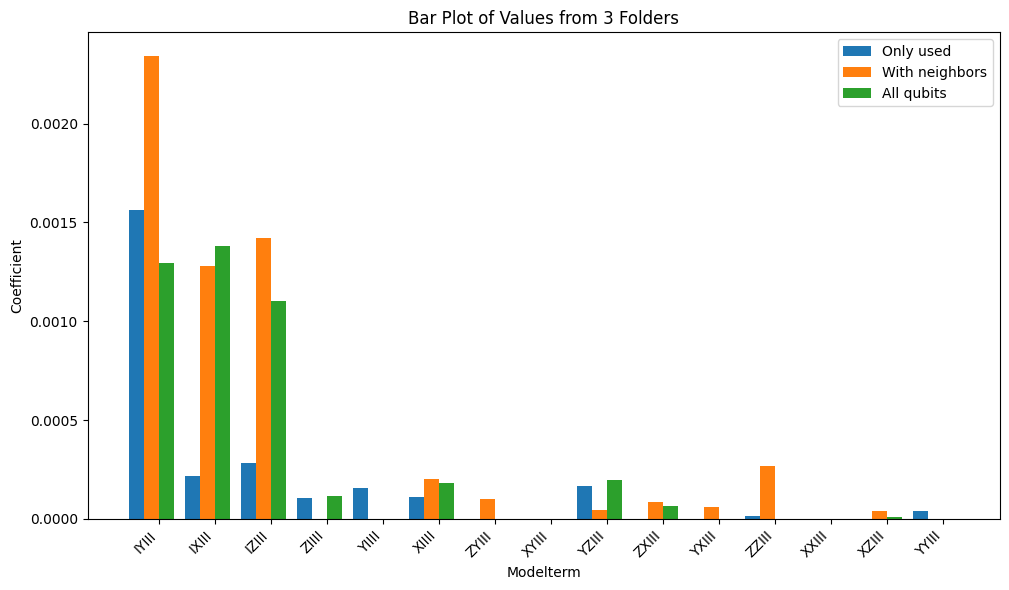

In [54]:
infidelities_list = []
coeffs_list = []
labels = []
coe = True
for experiment, folder in zip(experiments, filtered_folders):
    cipher = decipher_name(folder)
    if cipher["tomography_connections"]:
        labels.append("With neighbors")
    elif cipher["allqubits"]:
        labels.append("All qubits")
    else:
        labels.append("Only used")
    print("tomography_connections", cipher["tomography_connections"])
    print("allqubits", cipher["allqubits"])

    layer = experiment.analysis.get_layer_data(0)
    groups = [term for lis in model_terms(layer, (3,),(4,),(3,4)) for term in lis]
    print(groups)
    coeffs_dict = dict(layer.noisemodel.coeffs)
    coeffs = [coeffs_dict[term] for term in groups]
    coeffs_list.append(coeffs)
    infidelities = [1-layer._term_data[term].fidelity for term in groups]
    infidelities_list.append(infidelities)
    print(infidelities)

# Create the bar plot
x = np.arange(len(groups))  # Label locations
width = 0.8 / len(filtered_folders)  # Width of the bars, adjusted for the number of datasets

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for each folder's data dynamically
for i in range(len(filtered_folders)):
    if coe:
        ax.bar(x + (i - len(filtered_folders)/2) * width, coeffs_list[i], width, label=labels[i])
    else:
        ax.bar(x + (i - len(filtered_folders)/2) * width, infidelities_list[i], width, label=labels[i])

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Modelterm')
ax.set_title('Bar Plot of Values from 3 Folders')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha='right')

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
#plt.show()
if coe:
    ax.set_ylabel('Coefficient')
    plt.savefig("Coefficient")
else:
    ax.set_ylabel('Infidelity')
    plt.savefig("Infidelity")